In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# NANCY TRUONG

30/09/2025

# Resampling methods



## Cross validation

We are going to work with the air pollution data set ´pollution_cleaneddata.csv´ and use resampling methods to evaluate the predictive performance of alternative model choices.

In [4]:
df = pd.read_csv(r"C:\Users\MY NGOC\Documents\LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\Exercise 9\Data\pollution_cleaneddata.csv")
df.head()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


Specify a polynomial regression model with degree p that predicts mortality as a function of the average July temperature in degrees F.

In [5]:
betas = np.polyfit(df['JULT'], df['MORT'],1)
poly = np.poly1d(betas)

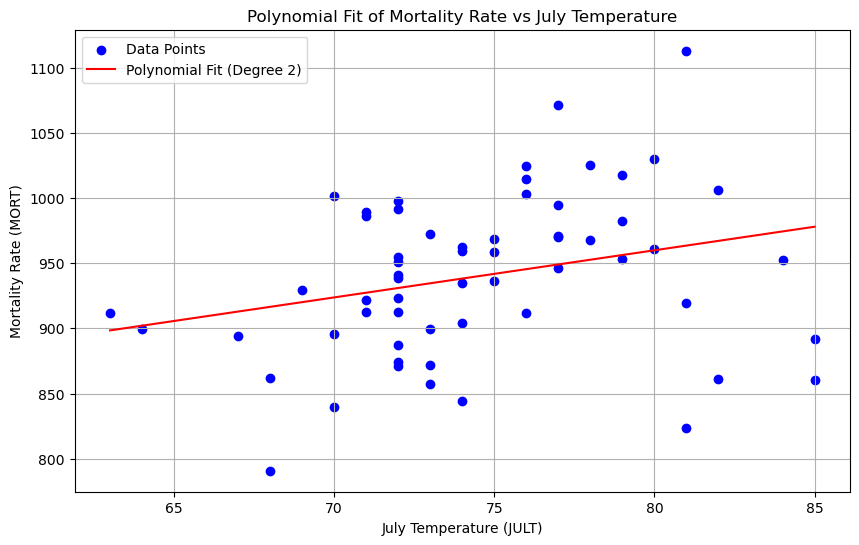

In [6]:
y_mort = df['MORT']
#y_poly = poly(df['JULT'])
x_jult = df['JULT']
x_linspace = np.linspace(min(x_jult), max(x_jult), 100)
y_poly = poly(x_linspace)
plt.figure(figsize=(10,6))
plt.scatter(x_jult, y_mort, color='blue', label='Data Points')
plt.plot(x_linspace, y_poly, color='red', label='Polynomial Fit (Degree 2)')
plt.xlabel('July Temperature (JULT)')
plt.ylabel('Mortality Rate (MORT)')
plt.title('Polynomial Fit of Mortality Rate vs July Temperature')
plt.legend()
plt.grid()
plt.show()

## Validation set approach

Set a seed for the random number generator.

Split data into two equal sized sets, one for training and one for testing.

For polynomial models with degree 1 up to 4, derive the mean square error of prediction for the training and testing data sets, respectively.

Present the results in a plot with polynomial degree on the x-axis and Mean Square Error on the y-axis (example provided below).

Judging from the graph you just generated, which degree of the polynomial would you recommend if the goal is to have a small variance of new predictions.

Repeat the procedure ten times but with other random seeds. Do you get similar results for other seeds?

In [7]:
random_state = 41
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_jult, y_mort, test_size=0.5, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30,), (30,), (30,), (30,))

Degree: 1
MSE train: 2496.610474895269
MSE test: 4905.940360160006

Degree: 2
MSE train: 2174.1014564497455
MSE test: 7735.334710949495

Degree: 3
MSE train: 2041.5883304117842
MSE test: 5472.877556997936

Degree: 4
MSE train: 1962.0264168872202
MSE test: 10767.597285625052



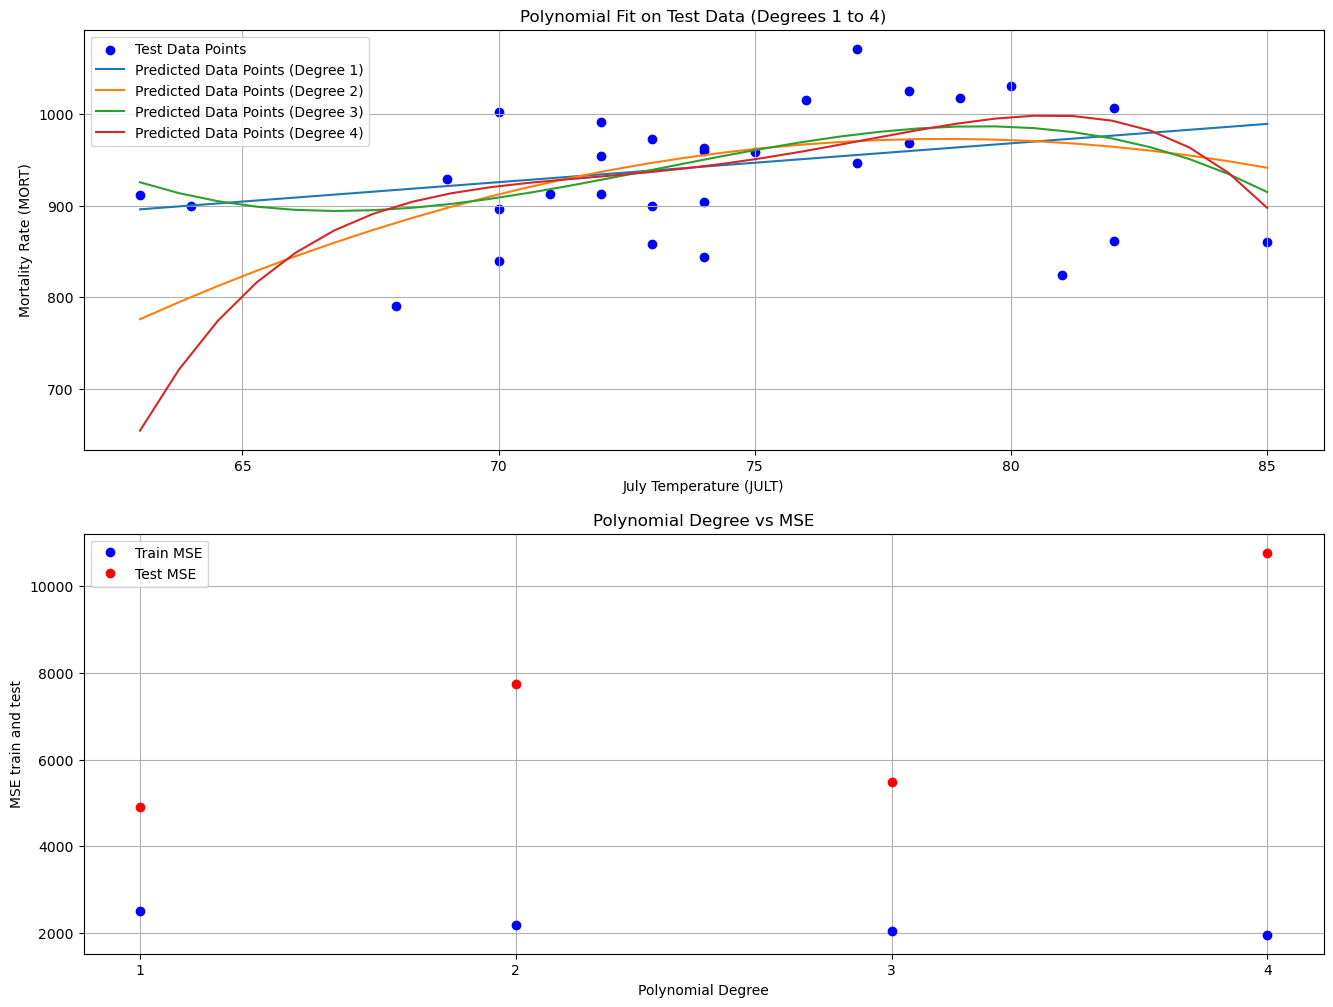

In [8]:
np.random.seed(random_state)
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
#plt.figure(figsize=(10,6))
ax[0].scatter(X_test, y_test, color='blue', label='Test Data Points')
degree_p = 4
x_linspace = np.linspace(min(X_test), max(X_test), len(X_test))
for i in range(degree_p):
    print(f"Degree: {i+1}")
    betas = np.polyfit(X_train, y_train, i+1)
    poly = np.poly1d(betas)
    y_pred = poly(x_linspace)
    mse_train = np.mean((y_train - poly(X_train))**2)
    mse_test = np.mean((y_test - y_pred)**2)
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}\n")
    ax[0].plot(x_linspace, y_pred, label='Predicted Data Points (Degree {})'.format(i+1))
    # Present the results in a plot with polynomial degree on the x-axis and Mean Square Error on the y-axis (example provided below).
    ax[1].plot(i+1, mse_train, 'bo', label='Train MSE' if i==0 else "")
    ax[1].plot(i+1, mse_test, 'ro', label='Test MSE' if i==0 else "")
    
   
ax[0].set_xlabel('July Temperature (JULT)')
ax[0].set_ylabel('Mortality Rate (MORT)')
ax[0].set_title(f'Polynomial Fit on Test Data (Degrees 1 to {degree_p})')
ax[0].legend()
ax[0].grid()

ax[1].set_xticks(range(1, degree_p+1))
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('MSE train and test')
ax[1].set_title(f'Polynomial Degree vs MSE')
ax[1].legend()
ax[1].grid()

plt.show()


Judging from the graph you just generated, which degree of the polynomial would you recommend if the goal is to have a small variance of new predictions.

Degree 2 seems to be a good choice with good balance between underfitting and overfitting.


Repeat the procedure ten times but with other random seeds. Do you get similar results for other seeds?

C:\Users\MY NGOC\AppData\Local\Temp\ipykernel_18320\653966736.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(1, degree_p+1))
C:\Users\MY NGOC\AppData\Local\Temp\ipykernel_18320\653966736.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(1, degree_p+1))


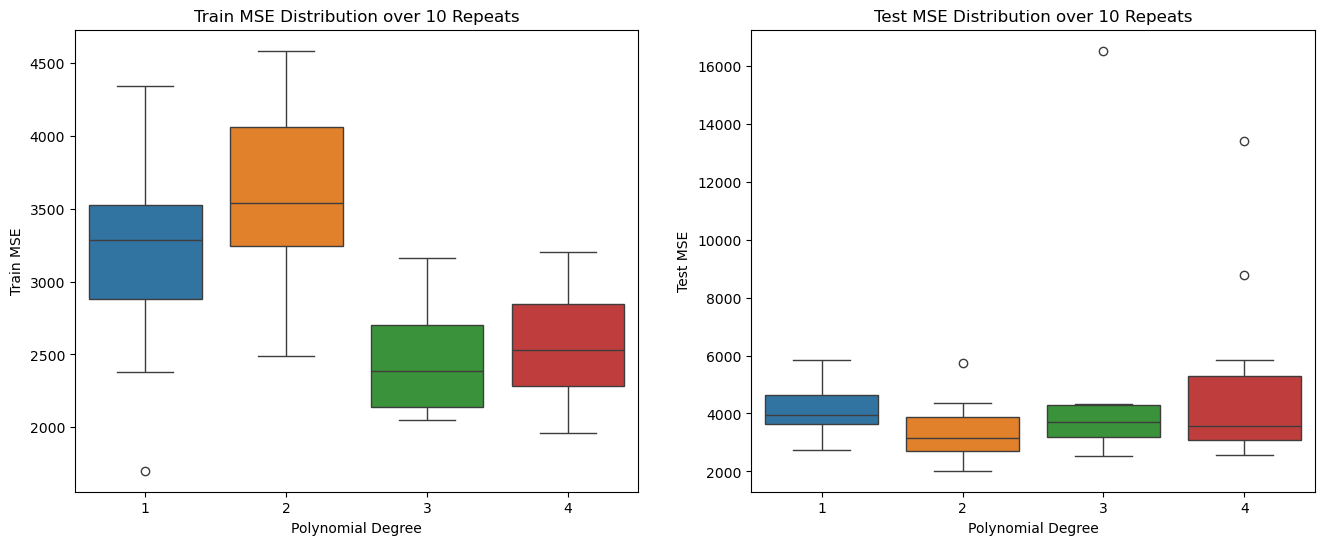

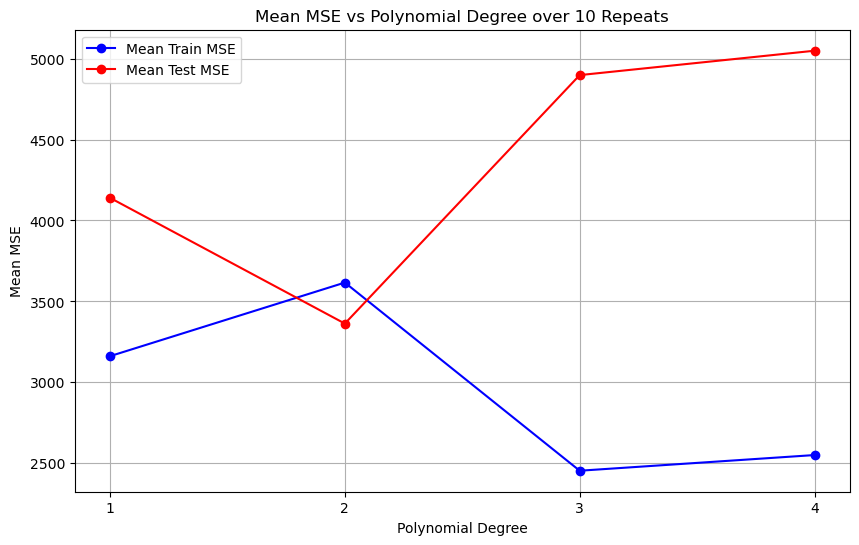

In [10]:
n_repeats = 10

train_MSEs = []
test_MSEs = []
for degree in range(1, degree_p+1):
    mse_train_list = []
    mse_test_list = []
    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(x_jult, y_mort, test_size=0.5, random_state=None)
        betas = np.polyfit(X_train, y_train, degree)
        poly = np.poly1d(betas)
        mse_train = np.mean((y_train - poly(X_train))**2)
        mse_test = np.mean((y_test - poly(X_test))**2)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
    train_MSEs.append(mse_train_list)
    test_MSEs.append(mse_test_list)
train_MSEs = np.array(train_MSEs)
test_MSEs = np.array(test_MSEs)
train_MSEs.shape, test_MSEs.shape
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train_MSEs.T, ax=ax[0])
ax[0].set_xticklabels(range(1, degree_p+1))
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('Train MSE')
ax[0].set_title('Train MSE Distribution over 10 Repeats')
sns.boxplot(data=test_MSEs.T, ax=ax[1])
ax[1].set_xticklabels(range(1, degree_p+1))
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('Test MSE')
ax[1].set_title('Test MSE Distribution over 10 Repeats')
plt.show()
mean_train_MSEs = np.mean(train_MSEs, axis=1)
mean_test_MSEs = np.mean(test_MSEs, axis=1)
plt.figure(figsize=(10,6))
plt.plot(range(1, degree_p+1), mean_train_MSEs, 'bo-', label='Mean Train MSE')
plt.plot(range(1, degree_p+1), mean_test_MSEs, 'ro-', label='Mean Test MSE')
plt.xticks(range(1, degree_p+1))
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean MSE')
plt.title('Mean MSE vs Polynomial Degree over 10 Repeats')
plt.legend()
plt.grid()
plt.show()

In [11]:
train_MSEs

array([[1701.10717644, 2376.18753614, 3358.92949045, 2828.60695767,
        3047.27206702, 4344.55010843, 3731.33611472, 3208.13693334,
        3474.36530213, 3547.78735529],
       [4394.55138811, 3127.02076363, 3696.78233072, 3410.25994989,
        4586.7736562 , 2492.40993499, 3188.26068842, 4184.20502225,
        3567.9957895 , 3515.51795552],
       [2191.07360512, 3161.76426334, 2720.90037656, 2127.09078277,
        2785.89058443, 2053.00068649, 2641.40517916, 2168.00951122,
        2113.94867535, 2578.28865703],
       [2336.01090571, 1962.73277406, 2705.06675841, 2788.63859974,
        2351.86329095, 2876.67959867, 2261.93414765, 3207.13932782,
        2866.50217662, 2152.97006369]])

## K-fold cross-validation

Select a polynomial degree, e.g. . Estimate the variance of predictions using the K-fold cross-validation approach where you hold out  sets.

Repeat the procedure ten times but with other random seeds. Do you get similar results for other seeds? If so, why?

In [12]:
np.random.seed(random_state)

k_folds = 3
fold_size = len(x_jult) // k_folds
#fold_size
indices = np.arange(len(x_jult))
np.random.shuffle(indices)
x_jult_shuffled = x_jult.iloc[indices]
y_mort_shuffled = y_mort.iloc[indices]
x_jult_shuffled = x_jult_shuffled.reset_index(drop=True)
y_mort_shuffled = y_mort_shuffled.reset_index(drop=True)
x_jult_shuffled.head(), y_mort_shuffled.head()


(0    74.0
 1    72.0
 2    79.0
 3    72.0
 4    73.0
 Name: JULT, dtype: float64,
 0     904.155
 1     912.347
 2    1017.613
 3     954.442
 4     972.464
 Name: MORT, dtype: float64)

In [13]:
MSEs_test = []
chosen_degree = 2
for fold in range(k_folds):
    start = fold * fold_size
    end = start + fold_size if fold != k_folds - 1 else len(x_jult)
    #print(start,end)
    X_test_fold = x_jult_shuffled[start:end]
    y_test_fold = y_mort_shuffled[start:end]
    X_train_fold = pd.concat([x_jult_shuffled[:start], x_jult_shuffled[end:]])
    y_train_fold = pd.concat([y_mort_shuffled[:start], y_mort_shuffled[end:]])
    
    
    
    betas = np.polyfit(X_train_fold, y_train_fold, chosen_degree)
    poly = np.poly1d(betas)
    mse_test = np.mean((y_test_fold - poly(X_test_fold))**2)
    MSEs_test.append(mse_test)
    

MSEs_test = np.array(MSEs_test)
print(f"Estimated Test MSEs from {k_folds}-fold Cross-Validation for polynomial degree {chosen_degree}:")
print(np.mean(MSEs_test))




    

Estimated Test MSEs from 3-fold Cross-Validation for polynomial degree 2:
3864.427237524087


Repeat the procedure ten times but with other random seeds. Do you get similar results for other seeds? If so, why?

In [21]:
n_repeats = 10
chosen_degree = 2
k_folds = 3
fold_size = len(x_jult) // k_folds
mean_MSEs_test = []

for seed in range(10):
    np.random.seed(seed)
    indices = np.arange(len(x_jult))
    np.random.shuffle(indices)
    x_jult_shuffled = x_jult.iloc[indices]
    y_mort_shuffled = y_mort.iloc[indices]
    x_jult_shuffled = x_jult_shuffled.reset_index(drop=True)
    y_mort_shuffled = y_mort_shuffled.reset_index(drop=True)
    
    MSEs_test = []

    for fold in range(k_folds):
        start = fold * fold_size
        end = start + fold_size if fold != k_folds - 1 else len(x_jult)
        #print(start,end)
        X_test_fold = x_jult_shuffled[start:end]
        y_test_fold = y_mort_shuffled[start:end]
        X_train_fold = pd.concat([x_jult_shuffled[:start], x_jult_shuffled[end:]])
        y_train_fold = pd.concat([y_mort_shuffled[:start], y_mort_shuffled[end:]])
        
        
        betas = np.polyfit(X_train_fold, y_train_fold, chosen_degree)
        poly = np.poly1d(betas)
        mse_test = np.mean((y_test_fold - poly(X_test_fold))**2)
        MSEs_test.append(mse_test)
    
    mean_MSEs_test.append(np.mean(MSEs_test))
    
print("Mean Test MSEs from 10 different 3-fold Cross-Validation runs:")
for i, mse in enumerate(mean_MSEs_test):
    print(f"Run {i+1}: {mse}")
print(f"Overall Mean Test MSE: {np.mean(mean_MSEs_test)}")

    

Mean Test MSEs from 10 different 3-fold Cross-Validation runs:
Run 1: 4049.4894374550736
Run 2: 5175.994078205599
Run 3: 5176.310229255449
Run 4: 3513.029877215748
Run 5: 3826.8037940927147
Run 6: 3924.19987413451
Run 7: 5740.597705175954
Run 8: 3758.7493684998603
Run 9: 3576.5170642299804
Run 10: 5723.806749641523
Overall Mean Test MSE: 4446.549817790641


The MSEs vary somewhat between runs, ranging roughly from 3500 to 5700.

The results are roughly similar for other seeds. They are roughly in the same range, but there is some variability. This variability comes from the random shuffling of the data. Different seeds lead to slighly different train/test splits, which changes which points are in each fold.



## The Bootstrap

Use the bootstrap to estimate the standard error of the slope of the line in the Poisson regression of the birds over time

In [22]:
df1 = pd.read_csv(r"C:\Users\MY NGOC\Documents\LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\Exercise 9\Data\bird_count.csv")

df1.head()

,count,yr,observerAge,lineCov
0,2,2011,63,1.000000
1,5,2010,64,0.987500
2,12,2002,30,0.991667
3,12,2006,60,0.987500
4,5,2008,62,0.987500


In [23]:
df1 = df1[['count', 'yr']]
df1.head(), df1.shape

(   count    yr
 0      2  2011
 1      5  2010
 2     12  2002
 3     12  2006
 4      5  2008,
 (13, 2))

In [24]:
class PoissonMLE():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def loglik(self, betas):
        # model_i means beta0 + beta1 * x_i
        model = betas[0] + betas[1] * self.X
        constant = 0
        for val in self.Y:
            constant += math.factorial(val)
        return np.sum(y * model - np.exp(model)) - constant
    '''
    Want to find maximum likelihood estimator
    Find zeros of the first derrivative
    Hard to solve algebraiclly
    Use Newton's method to estimate it, convergence 

    So we find zeros of the 1st derivative
    Need second derivative 
    Method: 
        x_n+1 = x_n - f(x_n) / f'(x_n)
    Our f is the 1st derrivative
    f' is 2nd
    '''

    def gradient(self, lambda_x):
        
        f_1 = np.sum(self.Y - lambda_x)
        f_2 = np.sum((self.Y - lambda_x) * self.X)

        return np.array([f_1, f_2])
    
    def hessian(self, lambda_x):
        """
        Matrix of second derrivative
        In our case, it is f'
        """

        h_00 = - np.sum(lambda_x)
        h_01 = - np.sum(self.X * lambda_x)
        h_11 = - np.sum(self.X * self.X * lambda_x)

        return np.array([[h_00, h_01],
                         [h_01, h_11]])
    
    def newton_method(self, tol, n_times):
        """
        Our equation:
        beta_new = beta - H_inv @ gradient
        
        Dimensions:
            beta_new: 2 x 1
            H_inv : 2x2
            gradient: 2 x 1
        """
        betas = np.zeros(2) # first guess [0,0]
        #model = betas[0] + betas[1] * self.x
        lambda_x = np.exp(betas[0] + betas[1] * self.X)
        for i in range(n_times):
            # Calculating H_inv is expensive and maybe unstable
            # maybe use solve Hx = gradient

            betas_new = betas - np.linalg.solve(self.hessian(lambda_x=lambda_x), self.gradient(lambda_x=lambda_x))
        
            #print(f"betas_new = {betas_new}, i = {i}")
            if np.max(np.abs(betas_new - betas)) < tol:
                betas = betas_new
                #print(f"Done after {i} iters")
                break
            betas = betas_new
            lambda_x = np.exp(betas[0] + betas[1] * self.X)
        return betas

In [25]:
Y_resp = df1['count'].values
Y_resp

array([ 2,  5, 12, 12,  5, 12,  5,  8,  9, 14, 10,  9,  5])

In [26]:
X_cov = df1['yr'].values
X_standardised = (X_cov - np.mean(X_cov)) / np.std(X_cov)
print(X_standardised)

[ 1.2879771   1.04531475 -0.89598407  0.07466534  0.55999004  1.53063946
 -1.38130878 -0.16799701  0.31732769 -0.41065937 -1.62397113 -1.13864642
  0.8026524 ]


In [27]:
model0 = PoissonMLE(X=X_standardised, Y=Y_resp)
model0

In [28]:
betas = np.array(model0.newton_method(tol=1e-10, n_times=100000))
print(betas)
Y_hat =  np.exp(betas[0] + betas[1] * X_standardised)

[ 2.10821222 -0.13369671]


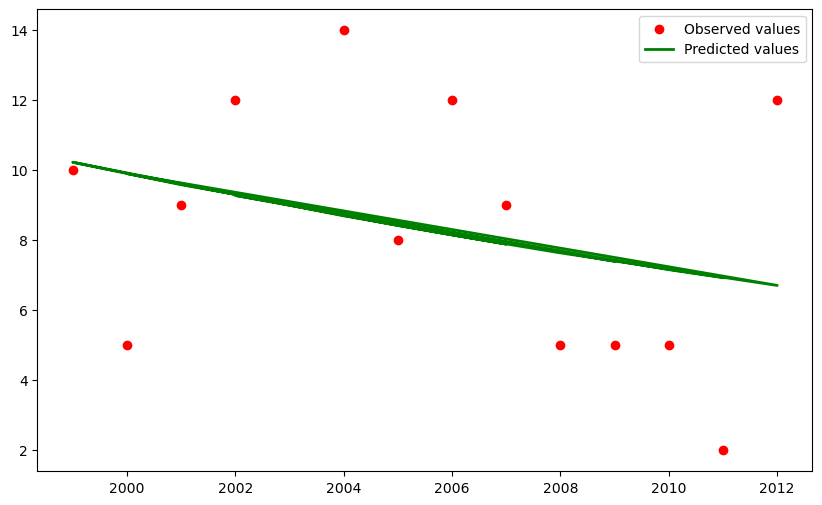

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x=X_cov, y=Y_resp,c='r', label="Observed values")
plt.plot(X_cov,Y_hat, color='green',linewidth=2,label="Predicted values")
plt.legend()
plt.show()

In [32]:
n_bootstraps = 1000
slope_estimates = []

for i in range(n_bootstraps):
    bootstrap_sample = df1.sample(frac=1, replace=True)
    x_boot = bootstrap_sample['yr'].values
    x_boot_standardised = (x_boot - np.mean(X_cov)) / np.std(X_cov)
    y_boot = bootstrap_sample['count'].values
    model_boot = PoissonMLE(X=x_boot_standardised, Y=y_boot)
    betas_boot = model_boot.newton_method(tol=1e-10, n_times=100000)
    slope_estimates.append(betas_boot[1])
slope_estimates = np.array(slope_estimates)
slope_std = np.std(slope_estimates)
print(f"Estimated standard deviation of the slope: {slope_std}")

Estimated standard deviation of the slope: 0.13709503555998764


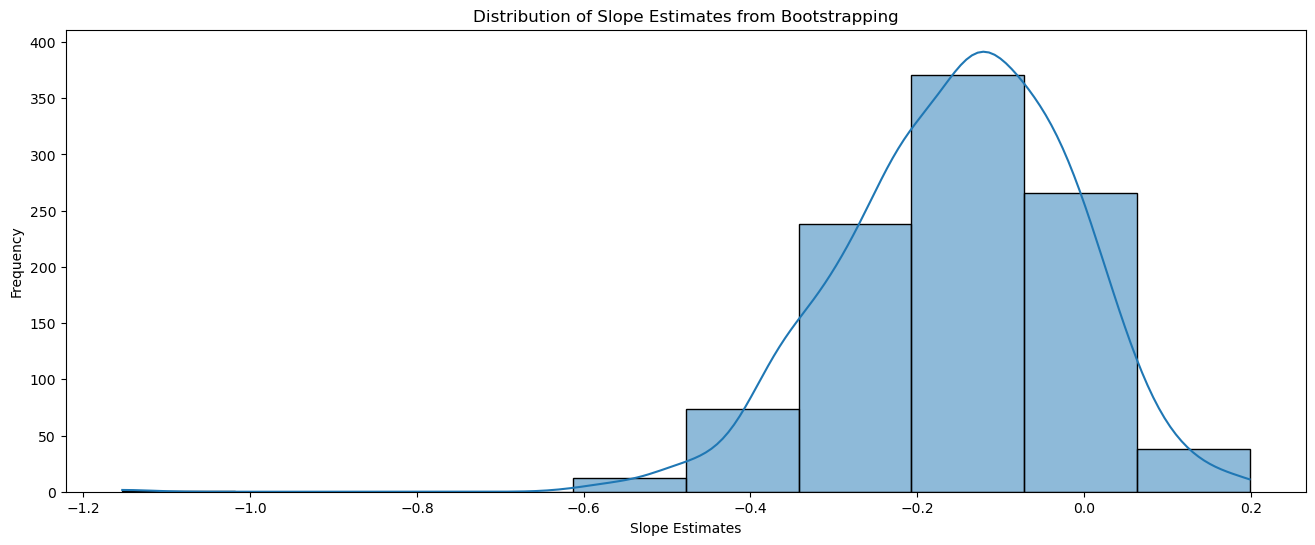

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(slope_estimates, bins=10, kde=True, ax=ax)
ax.set_xlabel('Slope Estimates')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Slope Estimates from Bootstrapping')
plt.show()